# Project: Income Qualification

In [30]:
# Importing libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.shape

(9557, 143)

In [4]:
test_df.shape

(23856, 142)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [7]:
# Identify the output variable.

train_df['Target']

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [8]:
# Understand the type of the data

train_df.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [9]:
test_df.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBhogar_nin         int64
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Length: 142, dtype: object

In [10]:
# Check if there are any biases in your dataset.

train_df['Target'].value_counts()

# Insight: There is bias with Target - 4

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

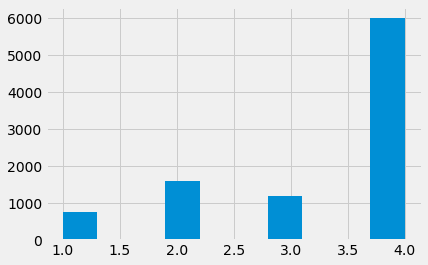

In [58]:
train_df['Target'].hist()

In [120]:
# Check whether all members of the house have the same poverty level.

# 1 = extreme poverty 
# 2 = moderate poverty
# 3 = vulnerable households 
# 4 = non vulnerable households

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

mem_p_level = train_df.groupby('idhogar')['r4t3'].unique().sum()

print('Houses with same poverty level of all the members : ',mem_p_level)


Houses with same poverty level of all the members :  [9643]


In [71]:
# Check if there is a house without a family head.

#d1 = train_df.loc[train_df['parentesco1']==1]
#print("Count of Houses without Family head is: ",len(train_df)-len(d1))

households_head = train_df.groupby('idhogar')['parentesco1'].sum()

# Find households without a head

households_no_head = train_df.loc[train_df['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [115]:
# Set poverty level of the members and the head of the house within a family.

p_level = int(train_df[(train_df['idhogar'] == 1) & (train_df['parentesco1'] == 1.0)]['Target'])
train_df.loc[train_df['idhogar'] == 1, 'Target'] = p_level

print('There are {} houses with different poverty level.'.format(p_level))

There are 2 houses with different poverty level.


In [14]:
# Count how many null values are existing in columns.

train_df.isnull().sum()

# Insight: Gets Count of null values in each column respetively

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [15]:
train_df.columns[train_df.isnull().sum()!=0]

#Insight: Result is the column names that have null values

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

In [16]:
# Remove null value rows of the target variable.

train_df.loc[train_df['v2a1'].isna()]

train_df['v2a1'].describe()

train_df['v2a1'] = train_df['v2a1'].fillna(0)

# Insight: 6860 rows is with NaN values in "v2a1" column (Monthly rent payment)
#          As the min value equals to "0", 
#          so the best choice is NaN values are filled with 0

In [17]:
train_df.loc[train_df['v18q1'].isna()]

train_df['v18q1'].describe()
train_df['v18q1'].unique()

train_df['v18q1'] = train_df['v18q1'].fillna(0)

#Insight: 7342 rows is with NaN values in "v18q1" column (number of tablets household owns)
#         As the column values are integers (count of tablets) without 0 
#         thus filling NaN values as 0

In [18]:
train_df.loc[train_df['rez_esc'].isna()]

train_df['rez_esc'].describe()

train_df['rez_esc'] = train_df['rez_esc'].fillna(0)

#Insight: 7928 rows is with NaN values in rez_esc column
#         Filling values with "0"

In [19]:
train_df.loc[train_df['meaneduc'].isna()]

train_df['meaneduc'].describe()

train_df['meaneduc'] = train_df['meaneduc'].fillna(0)

#Insight: 5 rows is with NaN values in meaneduc column

In [20]:
train_df.loc[train_df['SQBmeaned'].isna()]

train_df['SQBmeaned'].describe()

train_df['SQBmeaned'] = train_df['SQBmeaned'].fillna(0)

#Insight: 5 rows is with NaN values in SQBmeaned column

In [48]:
# Removing NaN values in the test data and replacing them with "0"

test_df.isnull().sum()
test_df = test_df.fillna(0)

In [22]:
# Checking for mixed data columns

train_df.columns[train_df.dtypes == object]


Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [50]:
# Applying Label Encoding on the columns - 'idhogar', 'dependency', 'edjefe', 'edjefa'

from sklearn.preprocessing import LabelEncoder

#train_df['dependency'] = train_df['dependency',inplace = True].replace(yes_or_no).astype(np.float32)

def encode_data(df):
   
    yes_or_no = {'no': 0, 'yes': 1}
    
    df['dependency'] = df['dependency'].replace(yes_or_no).astype(np.float32)
    
    df['edjefe'] = df['edjefe'].replace(yes_or_no).astype(np.float32)
    df['edjefa'] = df['edjefa'].replace(yes_or_no).astype(np.float32)
    
    df['idhogar'] = LabelEncoder().fit_transform(df['idhogar'])
    
encode_data(train_df)
encode_data(test_df)

TypeError: Cannot compare types 'ndarray(dtype=float32)' and 'str'

In [99]:
#Train and Test Split the data

from sklearn.model_selection import train_test_split

#Splitting the data
X = train_df[['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3','estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7','parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5','parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10','parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3','instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8','instlevel9', 'mobilephone','rez_esc', 'escolari', 'age','hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo','paredpreb','pisocemento', 'pareddes', 'paredmad','paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother','pisonatur', 'pisonotiene', 'pisomadera','techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo','abastaguadentro', 'abastaguafuera', 'abastaguano','public', 'planpri', 'noelec', 'coopele', 'sanitario1','sanitario2', 'sanitario3', 'sanitario5',   'sanitario6','energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4','elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4','elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3','etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3','tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5','computer', 'television', 'lugar1', 'lugar2', 'lugar3','lugar4', 'lugar5', 'lugar6', 'area1', 'area2','rooms','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3', 'r4t1',  'r4t2','r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin','hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone', 'v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']]
#X = train_df[['v2a1','rooms','tamhog','r4t3','hhsize','v18q1','tamviv','r4t2','r4h2','r4t1','parentesco1','mobilephone']]
y = train_df['Target']

X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.2)


In [106]:
# Predict the accuracy using random forest classifier.

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

# Imported scikit-learn metrics module for accuracy calculation

from sklearn import metrics

print("Accuracy: %.2f%% " % ((metrics.accuracy_score(y_test, y_pred))*100))

Accuracy: 92.10% 


In [108]:
# train-test split evaluation of xgboost model

import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

model.fit(X_train, y_train)

# make predictions for test data

y_pred = model.predict(X_test)

# evaluate predictions

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.32%


In [101]:
# Check the accuracy using random forest with cross validation.

# k-fold cross validation evaluation of xgboost model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model

model = xgboost.XGBClassifier()

kfold = KFold(n_splits=10, random_state=7)

results = cross_val_score(model, X, y, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\Tejasri5\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 62.50% (9.06%)


Insights:

1. The Output variable is "Target" variable.
2. The type of the data is float64, int64, object
3. There are biases in the dataset.
4. Count of the members of the houses have the same poverty level - 9643
5. There are 15 houses without a family head.
6. There are 2 households with different poverty level of the members and the head of the house within a family.
7. Null values are existing in columns.
   v2a1 - 6860
   v18q1 - 7342
   rez_esc - 7928
   meaneduc - 5
   SQBmeaned - 5
8. Removed null value rows of the target variable.
9. 92.10% accuracy using random forest classifier.
10. 91.32% accuracy using xgboost model.
11. 62.50% accuracy with cross validation (k-fold cross validation evaluation of xgboost model).